# Introduction

We want to understand the connection between homelessness levels and housing prices in the Bay Area. We found two dataset groups to start.

For homelessness, we found government datasets that count the homeless every year according to different demographics, across all of California from 2017 to 2022.

For housing prices, we found a dataset from the California Association of Realtors that containts the median prices of existing single family homes (which we will refer to as median housing price from now on) from 1990 to 2023.  

To conduct our analysis, we will subset the datasets by the years available for both, which is from 2017 to 2022. First, for every county the Bay Area, we will compare the levels of homelessness and median housing price across the years.

Then, we will compare the levels of counties in the Bay Area against the rest of California.

We will then create a model that...

At the end, we will describe our main findings.

In [2]:
! pip install numpy pandas matplotlib seaborn

# 1. Data Collection and Cleaning
### Homelessness Dataset
https://catalog.data.gov/dataset/people-receiving-homeless-response-services-by-age-race-ethnicity-and-gender-b667d

Demographic Groups:
- Age
- Race
- Ethnicity
- Gender

### Median Prices of Existing Single Family Homes
https://www.car.org/marketdata/data/housingdata
- Homelessness
- Housing Prices
-    Median single family home prices
-    County

### Map of CoCs by County
The data collected on homelessness is organized by "Continuums of Care" or CoCs – local bodies that are given the responsibility to organize and deliver housing and services to the homeless. CoCs aren't necessarily assigned on a 1:1 for each county as you can see from the map below. Some CoCs account for multiple counties. 

On the other hand, the housing data is separated by county. 

Therefore, we will have to also streamline the datasets according to the more general of the two, the CoCs, and average the values for the multiple counties that fall under one CoC.
https://homelessstrategy.com/california-continuums-of-care/
https://homelessstrategy.com/map-of-california-continuums-of-care-by-region/

<img src="https://homelessstrategy.com/wp-content/uploads/2020/02/California_Continuums_Of_Care_2020_2550x3300.png" alt="CoC by County" width="400"/>





## Data Wrangling

### Consolidating Homelessness Datasets
[FOR NOW]
For simplicity throughout the analysis, we're going to explore the 4 datasets, explore the different categories for their unique demographic. However, we'll just be aggregating the sums per county so we have one row of the overal 'homeless count' per county.

In [8]:
# Import all relevant packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

from io import BytesIO

pd.set_option('display.max_columns', None)

#### Homelessness by Age

In [19]:
# Load dataset and rename column names to match other datasets
HbA_df_link = 'https://data.ca.gov/dataset/c7ed1ae4-4f93-4fc7-b603-3cd07a55d862/resource/b1a5ae24-5842-425c-b56c-aa90f8f1c767/download/experiencing_homelessness_age_demographics.csv'
HbA_df = pd.read_csv(HbA_df_link)
HbA_df.rename(columns={'EXPERIENCING_HOMELESSNESS_CNT': 'EXPERIENCING_HOMELESSNESS'}, inplace=True)

In [20]:
# Column names
HbA_df.columns

Index(['CALENDAR_YEAR', 'LOCATION_ID', 'LOCATION', 'AGE_GROUP_PUBLIC',
       'EXPERIENCING_HOMELESSNESS'],
      dtype='object')

In [21]:
# Categories
set(HbA_df['AGE_GROUP_PUBLIC'])

{'18-24', '25-34', '35-44', '45-54', '55-64', '65+', 'Under 18', 'Unknown'}

#### Homelessness by Ethnicity

In [22]:
# Load Dataset
HbE_df_link = 'https://data.ca.gov/dataset/c7ed1ae4-4f93-4fc7-b603-3cd07a55d862/resource/d59a65e6-08b4-4641-8118-79338328bbb2/download/experiencing_homelessness_ethnicity_demographics.csv'
HbE_df = pd.read_csv(HbE_df_link)
HbE_df.head()

,CALENDAR_YEAR,LOCATION_ID,LOCATION,ETHNICITY,EXPERIENCING_HOMELESSNESS
0,2017,All,California,Hispanic/Latinx,60962
1,2017,All,California,Not Hispanic/Latinx,119153
2,2017,All,California,Unknown,3791
3,2017,CA-500,Santa Clara County CoC,Hispanic/Latinx,5034
4,2017,CA-500,Santa Clara County CoC,Not Hispanic/Latinx,5074


In [23]:
# Column names
HbE_df.columns

Index(['CALENDAR_YEAR', 'LOCATION_ID', 'LOCATION', 'ETHNICITY',
       'EXPERIENCING_HOMELESSNESS'],
      dtype='object')

In [24]:
# Categories
set(HbE_df['ETHNICITY'])

{'Hispanic/Latinx', 'Not Hispanic/Latinx', 'Unknown'}

#### Homelessness by Race

In [25]:
# Load dataset
HbR_df_link = 'https://data.ca.gov/dataset/c7ed1ae4-4f93-4fc7-b603-3cd07a55d862/resource/b7ce1242-0e33-44c8-b561-4c34c5e78312/download/experiencing_homelessness_race_demographics.csv'
HbR_df = pd.read_csv(HbR_df_link)
HbR_df.head()

,CALENDAR_YEAR,LOCATION_ID,LOCATION,RACE,EXPERIENCING_HOMELESSNESS
0,2017,All,California,"American Indian, Alaska Native, or Indigenous",5638
1,2017,All,California,Asian or Asian American,3005
2,2017,All,California,"Black, African American, or African",57665
3,2017,All,California,Multiple Races,9048
4,2017,All,California,Native Hawaiian or Pacific Islander,2555


In [26]:
# Column names
HbR_df.columns

Index(['CALENDAR_YEAR', 'LOCATION_ID', 'LOCATION', 'RACE',
       'EXPERIENCING_HOMELESSNESS'],
      dtype='object')

In [27]:
# Categories
set(HbR_df['RACE'])

{'American Indian, Alaska Native, or Indigenous',
 'Asian or Asian American',
 'Black, African American, or African',
 'Multiple Races',
 'Native Hawaiian or Pacific Islander',
 'Unknown',
 'White'}

#### Homelessness by Gender

In [28]:
# Load dataset
HbG_df_link = 'https://data.ca.gov/dataset/c7ed1ae4-4f93-4fc7-b603-3cd07a55d862/resource/57142555-f2da-462f-a999-d44abf0af69c/download/experiencing_homelessness_gender_demographics.csv'
HbG_df = pd.read_csv(HbG_df_link)
HbG_df.head()

,CALENDAR_YEAR,LOCATION_ID,LOCATION,GENDER,EXPERIENCING_HOMELESSNESS
0,2017,All,California,Female,79670
1,2017,All,California,Male,101901
2,2017,All,California,Non-Singular Gender,148
3,2017,All,California,Questioning Gender,*
4,2017,All,California,Transgender,676


In [29]:
# Column names
HbG_df.columns

Index(['CALENDAR_YEAR', 'LOCATION_ID', 'LOCATION', 'GENDER',
       'EXPERIENCING_HOMELESSNESS'],
      dtype='object')

In [30]:
# Categories
set(HbG_df['GENDER'])

{'Female',
 'Male',
 'Non-Singular Gender',
 'Questioning Gender',
 'Transgender',
 'Unknown'}

### Median Housing Prices

In [31]:
# URL of the Excel file
median_sfh_prices_link = 'https://content.car.org/Public%20Products/Current%20Sales%20and%20Price/MedianPricesofExistingDetachedHomesHistoricalData.xlsx'
median_sfh_prices_df = pd.read_excel(BytesIO(requests.get(median_sfh_prices_link).content), skiprows=7)

median_sfh_prices_df.head()

,Mon-Yr,CA,Alameda,Amador,Butte,Calaveras,Contra-Costa,Del Norte,El Dorado,Fresno,Glenn,Humboldt,Kern,Kings,Lake,Lassen,Los Angeles,Madera,Marin,Mariposa,Mendocino,Merced,Mono,Monterey,Napa,Nevada,Orange,Placer,Plumas,Riverside,Sacramento,San Benito,San Bernardino,San Diego,San Francisco,San Joaquin,San Luis Obispo,San Mateo,Santa Barbara,Santa Clara,Santa Cruz,Shasta,Siskiyou,Solano,Sonoma,Stanislaus,Sutter,Tehama,Trinity,Tulare,Tuolumne,Ventura,Yolo,Yuba,Unnamed: 54,Condo,LA Metro,Central Coast,Central Valley,Far North,Inland Empire,S.F. Bay Area,SoCal
0,1990-01-01,194952.0,226148.902299,NaN,102142.75,NaN,NaN,NaN,NaN,82083.125000,NaN,79641.892857,85892,NaN,NaN,NaN,215337.926006,NaN,346153.0,NaN,140000.000000,83889.0,93291.0,233333,178888.0,NaN,231273.890669,182220.0,NaN,136832.042365,123000.0,NaN,128806.0,180484.0,287499,105000.0,227522.359311,NaN,273071.291179,271840,250000.0,NaN,NaN,NaN,174022.0,NaN,NaN,NaN,NaN,86999.300000,NaN,250410.0,NaN,NaN,NaN,141519.0,203389.543331,NaN,NaN,NaN,NaN,227365.834348,NaN
1,1990-02-01,196273.0,219306.000000,NaN,83333.00,NaN,NaN,NaN,NaN,87186.781250,NaN,83571.071429,80294,NaN,NaN,NaN,208399.117906,NaN,338333.0,NaN,116665.833333,77499.0,NaN,187856,186363.0,NaN,233655.576728,182630.0,NaN,136021.271454,126900.0,NaN,124545.0,180714.0,300877,102500.0,236377.257623,NaN,259668.432093,273100,261607.0,NaN,NaN,NaN,180294.0,NaN,NaN,NaN,NaN,84374.562500,NaN,235760.0,NaN,NaN,NaN,144965.0,211024.114600,NaN,NaN,NaN,NaN,234739.457236,NaN
2,1990-03-01,194856.0,225162.000000,NaN,100000.00,NaN,NaN,NaN,NaN,83888.500000,NaN,88888.000000,87758,NaN,NaN,NaN,208134.862749,NaN,358571.0,NaN,111428.000000,85909.0,NaN,230555,180000.0,NaN,242312.497453,179470.0,NaN,135835.177355,127500.0,NaN,127017.0,183701.0,290151,117692.0,216010.036342,NaN,253300.991913,275500,260577.0,NaN,NaN,NaN,178823.0,NaN,NaN,NaN,NaN,84210.105263,NaN,240320.0,NaN,NaN,NaN,141132.0,209286.092622,NaN,NaN,NaN,NaN,235336.501496,NaN
3,1990-04-01,196111.0,229333.000000,NaN,107999.60,NaN,NaN,NaN,NaN,85428.028571,NaN,83499.650000,80323,NaN,NaN,NaN,219003.989632,NaN,359574.0,NaN,133332.666667,84285.0,NaN,238095,158571.0,NaN,239380.494779,200000.0,NaN,134629.071461,135500.0,NaN,131485.0,181567.0,288725,112692.0,189245.536376,NaN,217363.225250,274660,255263.0,NaN,NaN,NaN,184117.0,NaN,NaN,NaN,NaN,88927.678571,NaN,230620.0,NaN,NaN,NaN,145707.0,210301.589421,NaN,NaN,NaN,NaN,233178.496107,NaN
4,1990-05-01,195281.0,232291.000000,NaN,100000.00,NaN,NaN,NaN,NaN,88749.125000,NaN,79061.593750,86562,NaN,NaN,NaN,209065.024168,NaN,374999.0,NaN,138749.062500,100000.0,NaN,259375,187692.0,NaN,256401.384617,194610.0,NaN,140823.471660,138000.0,NaN,130538.0,180794.0,282626,112778.0,199325.054453,NaN,227608.897910,266670,262500.0,NaN,NaN,NaN,185844.0,NaN,NaN,NaN,NaN,85999.400000,NaN,235320.0,NaN,NaN,NaN,146060.0,210147.747929,NaN,NaN,NaN,NaN,235881.361604,NaN


In [32]:
median_sfh_prices_df.columns

Index(['Mon-Yr', 'CA', 'Alameda', 'Amador', 'Butte', 'Calaveras',
       'Contra-Costa', 'Del Norte', 'El Dorado', 'Fresno', 'Glenn', 'Humboldt',
       'Kern', 'Kings', 'Lake', 'Lassen', 'Los Angeles', 'Madera', 'Marin',
       'Mariposa', 'Mendocino', 'Merced', 'Mono', 'Monterey', 'Napa', 'Nevada',
       'Orange', 'Placer', 'Plumas', 'Riverside', 'Sacramento', 'San Benito',
       'San Bernardino', 'San Diego', 'San Francisco', 'San Joaquin',
       'San Luis Obispo', 'San Mateo', 'Santa Barbara', 'Santa Clara',
       'Santa Cruz', 'Shasta', 'Siskiyou', 'Solano', 'Sonoma', 'Stanislaus',
       'Sutter', 'Tehama', 'Trinity', 'Tulare', 'Tuolumne', 'Ventura', 'Yolo',
       'Yuba', 'Unnamed: 54', 'Condo', 'LA Metro', 'Central Coast',
       'Central Valley', 'Far North', 'Inland Empire', 'S.F. Bay Area',
       'SoCal'],
      dtype='object')

### Matching CoCs and Counties
All singular-county CoCs in the homeless data that matched a county in the housing data were retained. For the CoCs that grouped multiple counties, only those who had _all_ the counties of the group in the housing data were retained. The rest were removed.

Afterwards, all the counties that are grouped in the CoCs were then grouped together and given the average value in the housing data.

We understand that there may be other ways to group this data more fairly or accurately perhaps through weighted averages according to their relative distributions in the housing market, but we will be getting a simple average for simplicity.


#### Consolidate Homelessness Dataset
Note: Added average value of counties for "Bay Area"

In [33]:
# Bay Area
bay_area = ['Alameda', 'Contra Costa', 'Marin', 'Napa', 'San Francisco', 'San Mateo', 'Santa Clara', 'Solano', 'Sonoma']

# DELETE LATER 
# Load dataset and rename column names to match other datasets
HbA_df_link = 'https://data.ca.gov/dataset/c7ed1ae4-4f93-4fc7-b603-3cd07a55d862/resource/b1a5ae24-5842-425c-b56c-aa90f8f1c767/download/experiencing_homelessness_age_demographics.csv'
HbA_df = pd.read_csv(HbA_df_link)
HbA_df.rename(columns={'EXPERIENCING_HOMELESSNESS_CNT': 'EXPERIENCING_HOMELESSNESS'}, inplace=True)

# Convert to numeric to prevent calculation errors later
HbA_df['EXPERIENCING_HOMELESSNESS'] = pd.to_numeric(HbA_df['EXPERIENCING_HOMELESSNESS'], errors='coerce')

# Perform partial string matching to filter dataset for Bay Area counties
bay_HbA_df = HbA_df[HbA_df['LOCATION'].str.contains('|'.join(bay_area), case=False)]

# Calculate average 'EXPERIENCING_HOMELESSNESS' for Bay Area by 'CALENDAR_YEAR'
avg_bay_area = bay_HbA_df.groupby(list(bay_HbA_df.columns.difference(['EXPERIENCING_HOMELESSNESS'])), as_index=False)['EXPERIENCING_HOMELESSNESS'].mean()

# Add a row for 'Bay Area' with calculated average values
avg_bay_area['LOCATION'] = 'Bay Area'
HbA_df = pd.concat([HbA_df, avg_bay_area], ignore_index=True)

HbA_df['LOCATION']


0       California
1       California
2       California
3       California
4       California
           ...    
3004      Bay Area
3005      Bay Area
3006      Bay Area
3007      Bay Area
3008      Bay Area
Name: LOCATION, Length: 3009, dtype: object

In [34]:
# Custom function to merge all 4 homelessness datasets so that each as a dictionary
# Also creates an aggregate overall "homelessness" count for that location per year
def merge_homelessness_datasets(HbA_df, HbR_df, HbE_df, HbG_df):
    # Convert 'EXPERIENCING_HOMELESSNESS' columns to integer type so we don't run into trouble later on
    HbA_df['EXPERIENCING_HOMELESSNESS'] = pd.to_numeric(HbA_df['EXPERIENCING_HOMELESSNESS'], errors='coerce')
    HbR_df['EXPERIENCING_HOMELESSNESS'] = pd.to_numeric(HbR_df['EXPERIENCING_HOMELESSNESS'], errors='coerce')
    HbE_df['EXPERIENCING_HOMELESSNESS'] = pd.to_numeric(HbE_df['EXPERIENCING_HOMELESSNESS'], errors='coerce')
    HbG_df['EXPERIENCING_HOMELESSNESS'] = pd.to_numeric(HbG_df['EXPERIENCING_HOMELESSNESS'], errors='coerce')

    ### Add Bay Area ###
    for dataset in [HbA_df, HbR_df, HbE_df, HbG_df]:
        # Perform partial string matching to filter dataset for Bay Area counties
        bay_dataset = dataset[dataset['LOCATION'].str.contains('|'.join(bay_area), case=False)]

        # Calculate average 'EXPERIENCING_HOMELESSNESS' for Bay Area by 'CALENDAR_YEAR'
        avg_bay_area = bay_dataset.groupby(list(bay_dataset.columns.difference(['EXPERIENCING_HOMELESSNESS'])), as_index=False)['EXPERIENCING_HOMELESSNESS'].mean()

        # Add a row for 'Bay Area' with calculated average values
        avg_bay_area['LOCATION'] = 'Bay Area'
        dataset = pd.concat([dataset, avg_bay_area], ignore_index=True)
    ### –––––––––––– ###

    # Merge the datasets on common columns with different suffixes
    hdf = pd.merge(HbA_df, HbR_df, on=['CALENDAR_YEAR', 'LOCATION_ID', 'LOCATION'], how='outer', suffixes=('_A', '_R'))
    hdf = pd.merge(hdf, HbE_df, on=['CALENDAR_YEAR', 'LOCATION_ID', 'LOCATION'], how='outer', suffixes=('_AR', '_E'))
    hdf = pd.merge(hdf, HbG_df, on=['CALENDAR_YEAR', 'LOCATION_ID', 'LOCATION'], how='outer', suffixes=('_ARE', '_G'))

    # Group by common columns and aggregate data into a dictionary of dictionaries
    hdf = hdf.groupby(['CALENDAR_YEAR', 'LOCATION_ID', 'LOCATION']).apply(
        lambda x: {
            'AGE': dict(zip(x['AGE_GROUP_PUBLIC'], x['EXPERIENCING_HOMELESSNESS_A'])),
            'RACE': dict(zip(x['RACE'], x['EXPERIENCING_HOMELESSNESS_R'])),
            'ETHNICITY': dict(zip(x['ETHNICITY'], x['EXPERIENCING_HOMELESSNESS_ARE'])),
            'GENDER': dict(zip(x['GENDER'], x['EXPERIENCING_HOMELESSNESS_G']))
        }
    ).reset_index()

    # Extract dictionaries into separate columns
    hdf[['AGE', 'RACE', 'ETHNICITY', 'GENDER']] = pd.DataFrame(hdf[0].tolist(), index=hdf.index) #grouped.index ensures row alignment

    # Drop the leftover '0' column containing the dictionary of dictionaries made earlier
    hdf.drop(columns=[0], inplace=True)

    ### –– Create Aggregate Sum for Homelessness Per Year Per Location –– ###
    # Use HbA_df and replace non-numeric values in EXPERIENCING_HOMELESSNESS with NaN then convert to integer
    temp_df = HbA_df.copy()
    temp_df['EXPERIENCING_HOMELESSNESS'] = pd.to_numeric(temp_df['EXPERIENCING_HOMELESSNESS'], errors='coerce').fillna(0).astype(int)

    # Sum 'EXPERIENCING_HOMELESSNESS' and add to hdf as "TOTAL_HOMELESS" column
    hdf['TOTAL_HOMELESS'] = temp_df.groupby(['CALENDAR_YEAR', 'LOCATION_ID', 'LOCATION'], as_index=False)['EXPERIENCING_HOMELESSNESS'].sum()['EXPERIENCING_HOMELESSNESS']
    ### ––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––– ###

    return hdf


In [35]:
# Apply merge_homelessness_datasets function onto the four datasets and save as one dataset
pre_hdf = merge_homelessness_datasets(HbA_df, HbR_df, HbE_df, HbG_df)

pre_hdf

,CALENDAR_YEAR,LOCATION_ID,LOCATION,AGE,RACE,ETHNICITY,GENDER,TOTAL_HOMELESS
0,2017,All,California,"{'18-24': 15984.0, '25-34': 28654.0, '35-44': ...","{'American Indian, Alaska Native, or Indigenou...","{'Hispanic/Latinx': 60962.0, 'Not Hispanic/Lat...","{'Female': 79670.0, 'Male': 101901.0, 'Non-Sin...",186310
1,2017,CA-500,Bay Area,"{'18-24': 820.0, '25-34': 1585.0, '35-44': 152...",{nan: nan},{nan: nan},{nan: nan},10417
2,2017,CA-500,Santa Clara County CoC,"{'18-24': 820.0, '25-34': 1585.0, '35-44': 152...","{'American Indian, Alaska Native, or Indigenou...","{'Hispanic/Latinx': 5034.0, 'Not Hispanic/Lati...","{'Female': 3877.0, 'Male': 6225.0, 'Non-Singul...",10417
3,2017,CA-501,Bay Area,"{'18-24': 452.0, '25-34': 485.0, '35-44': 510....",{nan: nan},{nan: nan},{nan: nan},4407
4,2017,CA-501,San Francisco CoC,"{'18-24': 452.0, '25-34': 485.0, '35-44': 510....","{'American Indian, Alaska Native, or Indigenou...","{'Hispanic/Latinx': 1200.0, 'Not Hispanic/Lati...","{'Female': 1692.0, 'Male': 2403.0, 'Non-Singul...",4407
...,...,...,...,...,...,...,...,...
373,2023,CA-609,San Bernardino County CoC,"{'18-24': 696.0, '25-34': 1218.0, '35-44': 119...","{'American Indian, Alaska Native, or Indigenou...","{'Hispanic/Latinx': 2891.0, 'Not Hispanic/Lati...","{'Female': 4045.0, 'Male': 3864.0, 'Non-Singul...",8012
374,2023,CA-611,Ventura County CoC,"{'18-24': 108.0, '25-34': 313.0, '35-44': 386....","{'American Indian, Alaska Native, or Indigenou...","{'Hispanic/Latinx': 1003.0, 'Not Hispanic/Lati...","{'Female': 945.0, 'Male': 1313.0, 'Non-Singula...",2325
375,2023,CA-612,Glendale CoC (Los Angeles County),"{'18-24': 34.0, '25-34': 75.0, '35-44': 85.0, ...","{'American Indian, Alaska Native, or Indigenou...","{'Hispanic/Latinx': 206.0, 'Not Hispanic/Latin...","{'Female': 263.0, 'Male': 296.0, 'Non-Singular...",572
376,2023,CA-613,Imperial County CoC,"{'18-24': 84.0, '25-34': 174.0, '35-44': 121.0...","{'American Indian, Alaska Native, or Indigenou...","{'Hispanic/Latinx': 1109.0, 'Not Hispanic/Lati...","{'Female': 689.0, 'Male': 634.0, 'Non-Singular...",1337


### Clean and Filter Homelessness Dataset

In [36]:
# Custom function to clean and filter homelessness dataset
def clean_homelessness_dataset(df, locations):    
    # Remove 'Counties CoC' or 'County CoC' at the end of LOCATION column values
    df['LOCATION'] = df['LOCATION'].str.replace(r'\s(CoC|Count(y|ies) CoC)$', '', regex=True)
    
    # Filter the dataset for locations in the provided list
    filtered_df = df[df['LOCATION'].isin(locations)].copy()  # Make a copy here
    
    # Remove the 'LOCATION_ID' column
    filtered_df.drop(columns='LOCATION_ID', inplace=True)
    
    # Rename columns
    filtered_df.rename(columns={
        'CALENDAR_YEAR': 'Year',
        'LOCATION': 'CoC',
        'EXPERIENCING_HOMELESSNESS': 'Homeless'
    }, inplace=True)
    
    return filtered_df

In [37]:
# Apply filter and cleaning function
final_CoCs = ["California", "Bay Area", "San Francisco", "Alameda", "Amador, Calaveras, Mariposa, Tuolumne", "Butte", "Contra Costa", "El Dorado", "Humboldt", "Kern", "Marin", "Merced", "Napa", "Nevada", "Orange", "Placer", "Riverside", "Sacramento", "San Bernardino", "San Diego", "San Joaquin", "San Luis Obispo", "San Mateo", "Santa Barbara", "Santa Clara", "Santa Cruz", "Solano", "Sonoma", "Stanislaus", "Sutter", "Tehama", "Tulare", "Ventura", "Yolo", "Yuba"]
hdf = clean_homelessness_dataset(pre_hdf, final_CoCs)
hdf

,Year,CoC,AGE,RACE,ETHNICITY,GENDER,TOTAL_HOMELESS
0,2017,California,"{'18-24': 15984.0, '25-34': 28654.0, '35-44': ...","{'American Indian, Alaska Native, or Indigenou...","{'Hispanic/Latinx': 60962.0, 'Not Hispanic/Lat...","{'Female': 79670.0, 'Male': 101901.0, 'Non-Sin...",186310
1,2017,Bay Area,"{'18-24': 820.0, '25-34': 1585.0, '35-44': 152...",{nan: nan},{nan: nan},{nan: nan},10417
2,2017,Santa Clara,"{'18-24': 820.0, '25-34': 1585.0, '35-44': 152...","{'American Indian, Alaska Native, or Indigenou...","{'Hispanic/Latinx': 5034.0, 'Not Hispanic/Lati...","{'Female': 3877.0, 'Male': 6225.0, 'Non-Singul...",10417
3,2017,Bay Area,"{'18-24': 452.0, '25-34': 485.0, '35-44': 510....",{nan: nan},{nan: nan},{nan: nan},4407
4,2017,San Francisco,"{'18-24': 452.0, '25-34': 485.0, '35-44': 510....","{'American Indian, Alaska Native, or Indigenou...","{'Hispanic/Latinx': 1200.0, 'Not Hispanic/Lati...","{'Female': 1692.0, 'Male': 2403.0, 'Non-Singul...",4407
...,...,...,...,...,...,...,...
369,2023,Kern,"{'18-24': 537.0, '25-34': 1047.0, '35-44': 113...","{'American Indian, Alaska Native, or Indigenou...","{'Hispanic/Latinx': 2647.0, 'Not Hispanic/Lati...","{'Female': 2985.0, 'Male': 3355.0, 'Non-Singul...",6442
372,2023,Riverside,"{'18-24': 523.0, '25-34': 1452.0, '35-44': 153...","{'American Indian, Alaska Native, or Indigenou...","{'Hispanic/Latinx': 3270.0, 'Not Hispanic/Lati...","{'Female': 3752.0, 'Male': 4384.0, 'Non-Singul...",8268
373,2023,San Bernardino,"{'18-24': 696.0, '25-34': 1218.0, '35-44': 119...","{'American Indian, Alaska Native, or Indigenou...","{'Hispanic/Latinx': 2891.0, 'Not Hispanic/Lati...","{'Female': 4045.0, 'Male': 3864.0, 'Non-Singul...",8012
374,2023,Ventura,"{'18-24': 108.0, '25-34': 313.0, '35-44': 386....","{'American Indian, Alaska Native, or Indigenou...","{'Hispanic/Latinx': 1003.0, 'Not Hispanic/Lati...","{'Female': 945.0, 'Male': 1313.0, 'Non-Singula...",2325


#### Filter Pricing Dataset
Note: Added average prices of counties for "Bay Area"

In [38]:
# Custom function to clean and filter homelessness dataset
def clean_housing_dataset(df):
    # Make a copy
    pdf = df.copy()

    # Convert "Mon-Yr" column to datetime format
    pdf['Mon-Yr'] = pd.to_datetime(pdf['Mon-Yr'])
    pdf.rename(columns={'Mon-Yr': 'Year'}, inplace=True)

    # Extract year from the "Mon-Yr" column and group by year, calculating the mean for each column
    counties = pdf.columns.difference(['Year']) # get list of counties
    pdf = pdf.groupby(pdf['Year'].dt.year)[counties].mean(numeric_only=True)

    # Reset the index to bring 'Year' column back
    pdf.reset_index(inplace=True)

    # Filter data from 2017 to the latest year
    pdf = pdf[(pdf['Year'] >= 2017) & (pdf['Year'] <= 2023)]

    # Change names inconsistent with homeless dataset
    pdf.rename(columns={'CA': 'California', 'Contra-Costa': 'Contra Costa'}, inplace=True)
    
    # Create relevant lists
    single_CoCs = ["California", "San Francisco", "Alameda", "Butte", "California", "Alameda", "Amador", "Butte", "Calaveras", "Contra Costa", "El Dorado", "Humboldt", "Kern", "Marin", "Mariposa", "Merced", "Napa", "Nevada", "Orange", "Placer", "Riverside", "Sacramento", "San Bernardino", "San Diego", "San Joaquin", "San Luis Obispo", "San Mateo", "Santa Barbara", "Santa Clara", "Santa Cruz", "Solano", "Sonoma", "Stanislaus", "Sutter", "Tehama", "Tulare", "Tuolumne", "Ventura", "Yolo", "Yuba"]
    grouped_Cocs_1 = ["Amador", "Calaveras", "Mariposa", "Tuolumne"]

    # Filter for single_CoCs
    pdf = pdf[['Year']+single_CoCs]
    
    # Group county columns accordingly
    pdf[', '.join(grouped_Cocs_1)] = pdf[grouped_Cocs_1].mean(axis=1)
    
    # Remove all individual columns that are now part of the group
    pdf.drop(columns=grouped_Cocs_1, inplace=True)

    # Melt the DataFrame to transform the columns for counties into rows under a new column 'Median_Prices'
    melted_df = pdf.melt(id_vars='Year', var_name='CoC', value_name='Prices')

    
    ### Add Bay Area ###
    bay_area_data = melted_df[melted_df['CoC'].isin(bay_area)]

    # Calculate average Prices for Bay Area by 'Year' and create a new row for 'Bay Area'
    avg_bay_area = bay_area_data.groupby('Year')['Prices'].mean().reset_index()
    avg_bay_area['CoC'] = 'Bay Area'

    # Append the average Bay Area prices to melted_df
    melted_df = pd.concat([melted_df, avg_bay_area], ignore_index=True)
    ### –––––––––––– ###

    # Sort the values by 'Year' for better visualization
    melted_df = melted_df.sort_values(by='Year')
        
    return melted_df


In [39]:
# Apply cleaning function
pdf = clean_housing_dataset(median_sfh_prices_df)
pdf

,Year,CoC,Prices
0,2017,California,5.370258e+05
42,2017,Butte,2.990333e+05
49,2017,Contra Costa,6.118378e+05
56,2017,El Dorado,4.588917e+05
63,2017,Humboldt,3.054333e+05
...,...,...,...
202,2023,Sonoma,8.315989e+05
209,2023,Stanislaus,4.507389e+05
216,2023,Sutter,4.145000e+05
111,2023,Orange,1.251667e+06


# 2. Exploratory Data Analysis (EDA)

*   Simple trends of housing prices and homelessness over time
*   Geographical mapping
*   Demographic information of homeless

In [40]:
# Homelessness Dataset
hdf

,Year,CoC,AGE,RACE,ETHNICITY,GENDER,TOTAL_HOMELESS
0,2017,California,"{'18-24': 15984.0, '25-34': 28654.0, '35-44': ...","{'American Indian, Alaska Native, or Indigenou...","{'Hispanic/Latinx': 60962.0, 'Not Hispanic/Lat...","{'Female': 79670.0, 'Male': 101901.0, 'Non-Sin...",186310
1,2017,Bay Area,"{'18-24': 820.0, '25-34': 1585.0, '35-44': 152...",{nan: nan},{nan: nan},{nan: nan},10417
2,2017,Santa Clara,"{'18-24': 820.0, '25-34': 1585.0, '35-44': 152...","{'American Indian, Alaska Native, or Indigenou...","{'Hispanic/Latinx': 5034.0, 'Not Hispanic/Lati...","{'Female': 3877.0, 'Male': 6225.0, 'Non-Singul...",10417
3,2017,Bay Area,"{'18-24': 452.0, '25-34': 485.0, '35-44': 510....",{nan: nan},{nan: nan},{nan: nan},4407
4,2017,San Francisco,"{'18-24': 452.0, '25-34': 485.0, '35-44': 510....","{'American Indian, Alaska Native, or Indigenou...","{'Hispanic/Latinx': 1200.0, 'Not Hispanic/Lati...","{'Female': 1692.0, 'Male': 2403.0, 'Non-Singul...",4407
...,...,...,...,...,...,...,...
369,2023,Kern,"{'18-24': 537.0, '25-34': 1047.0, '35-44': 113...","{'American Indian, Alaska Native, or Indigenou...","{'Hispanic/Latinx': 2647.0, 'Not Hispanic/Lati...","{'Female': 2985.0, 'Male': 3355.0, 'Non-Singul...",6442
372,2023,Riverside,"{'18-24': 523.0, '25-34': 1452.0, '35-44': 153...","{'American Indian, Alaska Native, or Indigenou...","{'Hispanic/Latinx': 3270.0, 'Not Hispanic/Lati...","{'Female': 3752.0, 'Male': 4384.0, 'Non-Singul...",8268
373,2023,San Bernardino,"{'18-24': 696.0, '25-34': 1218.0, '35-44': 119...","{'American Indian, Alaska Native, or Indigenou...","{'Hispanic/Latinx': 2891.0, 'Not Hispanic/Lati...","{'Female': 4045.0, 'Male': 3864.0, 'Non-Singul...",8012
374,2023,Ventura,"{'18-24': 108.0, '25-34': 313.0, '35-44': 386....","{'American Indian, Alaska Native, or Indigenou...","{'Hispanic/Latinx': 1003.0, 'Not Hispanic/Lati...","{'Female': 945.0, 'Male': 1313.0, 'Non-Singula...",2325


In [41]:
# Prices Dataset
pdf

,Year,CoC,Prices
0,2017,California,5.370258e+05
42,2017,Butte,2.990333e+05
49,2017,Contra Costa,6.118378e+05
56,2017,El Dorado,4.588917e+05
63,2017,Humboldt,3.054333e+05
...,...,...,...
202,2023,Sonoma,8.315989e+05
209,2023,Stanislaus,4.507389e+05
216,2023,Sutter,4.145000e+05
111,2023,Orange,1.251667e+06


In [42]:
# Merged Dataset
df = pd.merge(hdf, pdf, on=["Year", "CoC"])
df

,Year,CoC,AGE,RACE,ETHNICITY,GENDER,TOTAL_HOMELESS,Prices
0,2017,California,"{'18-24': 15984.0, '25-34': 28654.0, '35-44': ...","{'American Indian, Alaska Native, or Indigenou...","{'Hispanic/Latinx': 60962.0, 'Not Hispanic/Lat...","{'Female': 79670.0, 'Male': 101901.0, 'Non-Sin...",186310,537025.750865
1,2017,California,"{'18-24': 15984.0, '25-34': 28654.0, '35-44': ...","{'American Indian, Alaska Native, or Indigenou...","{'Hispanic/Latinx': 60962.0, 'Not Hispanic/Lat...","{'Female': 79670.0, 'Male': 101901.0, 'Non-Sin...",186310,537025.750865
2,2017,Bay Area,"{'18-24': 820.0, '25-34': 1585.0, '35-44': 152...",{nan: nan},{nan: nan},{nan: nan},10417,926712.033333
3,2017,Bay Area,"{'18-24': 452.0, '25-34': 485.0, '35-44': 510....",{nan: nan},{nan: nan},{nan: nan},4407,926712.033333
4,2017,Bay Area,"{'18-24': 799.0, '25-34': 930.0, '35-44': 791....",{nan: nan},{nan: nan},{nan: nan},6723,926712.033333
...,...,...,...,...,...,...,...,...
296,2023,Kern,"{'18-24': 537.0, '25-34': 1047.0, '35-44': 113...","{'American Indian, Alaska Native, or Indigenou...","{'Hispanic/Latinx': 2647.0, 'Not Hispanic/Lati...","{'Female': 2985.0, 'Male': 3355.0, 'Non-Singul...",6442,378388.888889
297,2023,Riverside,"{'18-24': 523.0, '25-34': 1452.0, '35-44': 153...","{'American Indian, Alaska Native, or Indigenou...","{'Hispanic/Latinx': 3270.0, 'Not Hispanic/Lati...","{'Female': 3752.0, 'Male': 4384.0, 'Non-Singul...",8268,610777.777778
298,2023,San Bernardino,"{'18-24': 696.0, '25-34': 1218.0, '35-44': 119...","{'American Indian, Alaska Native, or Indigenou...","{'Hispanic/Latinx': 2891.0, 'Not Hispanic/Lati...","{'Female': 4045.0, 'Male': 3864.0, 'Non-Singul...",8012,468711.111111
299,2023,Ventura,"{'18-24': 108.0, '25-34': 313.0, '35-44': 386....","{'American Indian, Alaska Native, or Indigenou...","{'Hispanic/Latinx': 1003.0, 'Not Hispanic/Lati...","{'Female': 945.0, 'Male': 1313.0, 'Non-Singula...",2325,889444.444444


# Next Steps
For Tony and Sammy

### Explore San Francisco

In [43]:
# Starting point
df[df["CoC"]=="San Francisco"]

,Year,CoC,AGE,RACE,ETHNICITY,GENDER,TOTAL_HOMELESS,Prices
12,2017,San Francisco,"{'18-24': 452.0, '25-34': 485.0, '35-44': 510....","{'American Indian, Alaska Native, or Indigenou...","{'Hispanic/Latinx': 1200.0, 'Not Hispanic/Lati...","{'Female': 1692.0, 'Male': 2403.0, 'Non-Singul...",4407,1.414682e+06
55,2018,San Francisco,"{'18-24': 616.0, '25-34': 803.0, '35-44': 744....","{'American Indian, Alaska Native, or Indigenou...","{'Hispanic/Latinx': 1530.0, 'Not Hispanic/Lati...","{'Female': 2394.0, 'Male': 2998.0, 'Non-Singul...",5732,1.573333e+06
98,2019,San Francisco,"{'18-24': 880.0, '25-34': 1212.0, '35-44': 113...","{'American Indian, Alaska Native, or Indigenou...","{'Hispanic/Latinx': 2351.0, 'Not Hispanic/Lati...","{'Female': 3363.0, 'Male': 4398.0, 'Non-Singul...",8117,1.589417e+06
141,2020,San Francisco,"{'18-24': 1069.0, '25-34': 1834.0, '35-44': 18...","{'American Indian, Alaska Native, or Indigenou...","{'Hispanic/Latinx': 3037.0, 'Not Hispanic/Lati...","{'Female': 4390.0, 'Male': 6796.0, 'Non-Singul...",11683,1.646125e+06
184,2021,San Francisco,"{'18-24': 1222.0, '25-34': 2282.0, '35-44': 23...","{'American Indian, Alaska Native, or Indigenou...","{'Hispanic/Latinx': 3831.0, 'Not Hispanic/Lati...","{'Female': 5293.0, 'Male': 8231.0, 'Non-Singul...",14296,1.810700e+06
227,2022,San Francisco,"{'18-24': 1528.0, '25-34': 3578.0, '35-44': 35...","{'American Indian, Alaska Native, or Indigenou...","{'Hispanic/Latinx': 4994.0, 'Not Hispanic/Lati...","{'Female': 6847.0, 'Male': 10852.0, 'Non-Singu...",18759,1.775333e+06
270,2023,San Francisco,"{'18-24': 1165.0, '25-34': 2524.0, '35-44': 26...","{'American Indian, Alaska Native, or Indigenou...","{'Hispanic/Latinx': 4156.0, 'Not Hispanic/Lati...","{'Female': 5137.0, 'Male': 7937.0, 'Non-Singul...",13772,1.555833e+06


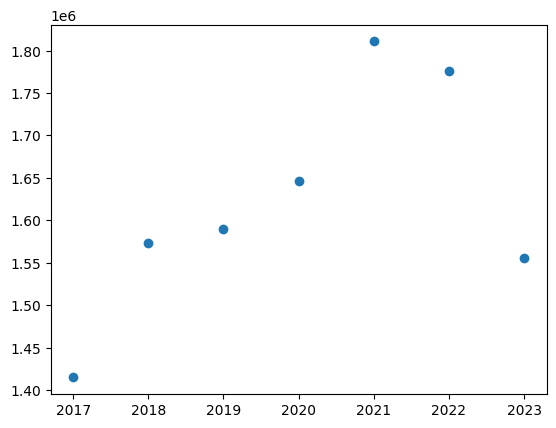

In [ ]:

plt.scatter(data=pdf[pdf["CoC"]=="San Francisco"], x="Year", y="Median_Prices")

### Explore Bay Area 

In [44]:
# Starting point
df[df["CoC"]=="Bay Area"]

,Year,CoC,AGE,RACE,ETHNICITY,GENDER,TOTAL_HOMELESS,Prices
2,2017,Bay Area,"{'18-24': 820.0, '25-34': 1585.0, '35-44': 152...",{nan: nan},{nan: nan},{nan: nan},10417,9.267120e+05
3,2017,Bay Area,"{'18-24': 452.0, '25-34': 485.0, '35-44': 510....",{nan: nan},{nan: nan},{nan: nan},4407,9.267120e+05
4,2017,Bay Area,"{'18-24': 799.0, '25-34': 930.0, '35-44': 791....",{nan: nan},{nan: nan},{nan: nan},6723,9.267120e+05
5,2017,Bay Area,"{'18-24': 298.0, '25-34': 460.0, '35-44': 464....",{nan: nan},{nan: nan},{nan: nan},3124,9.267120e+05
6,2017,Bay Area,"{'18-24': 345.0, '25-34': 790.0, '35-44': 803....",{nan: nan},{nan: nan},{nan: nan},5006,9.267120e+05
...,...,...,...,...,...,...,...,...
264,2023,Bay Area,"{'18-24': 794.0, '25-34': 1672.0, '35-44': 178...",{nan: nan},{nan: nan},{nan: nan},9839,1.242545e+06
265,2023,Bay Area,"{'18-24': 73.0, '25-34': 184.0, '35-44': 192.0...",{nan: nan},{nan: nan},{nan: nan},1270,1.242545e+06
266,2023,Bay Area,"{'18-24': 281.0, '25-34': 708.0, '35-44': 764....",{nan: nan},{nan: nan},{nan: nan},4839,1.242545e+06
267,2023,Bay Area,"{'18-24': 53.0, '25-34': 114.0, '35-44': 142.0...",{nan: nan},{nan: nan},{nan: nan},779,1.242545e+06


In [ ]:
plt.scatter(data=pdf[pdf["CoC"]=="San Francisco"], x="Year", y="Median_Prices")

### Explore California

In [45]:
# Starting point
df[df["CoC"]=="California"]

,Year,CoC,AGE,RACE,ETHNICITY,GENDER,TOTAL_HOMELESS,Prices
0,2017,California,"{'18-24': 15984.0, '25-34': 28654.0, '35-44': ...","{'American Indian, Alaska Native, or Indigenou...","{'Hispanic/Latinx': 60962.0, 'Not Hispanic/Lat...","{'Female': 79670.0, 'Male': 101901.0, 'Non-Sin...",186310,537025.750865
1,2017,California,"{'18-24': 15984.0, '25-34': 28654.0, '35-44': ...","{'American Indian, Alaska Native, or Indigenou...","{'Hispanic/Latinx': 60962.0, 'Not Hispanic/Lat...","{'Female': 79670.0, 'Male': 101901.0, 'Non-Sin...",186310,537025.750865
43,2018,California,"{'18-24': 18494.0, '25-34': 33689.0, '35-44': ...","{'American Indian, Alaska Native, or Indigenou...","{'Hispanic/Latinx': 71764.0, 'Not Hispanic/Lat...","{'Female': 91953.0, 'Male': 119525.0, 'Non-Sin...",217279,571057.500000
44,2018,California,"{'18-24': 18494.0, '25-34': 33689.0, '35-44': ...","{'American Indian, Alaska Native, or Indigenou...","{'Hispanic/Latinx': 71764.0, 'Not Hispanic/Lat...","{'Female': 91953.0, 'Male': 119525.0, 'Non-Sin...",217279,571057.500000
86,2019,California,"{'18-24': 19882.0, '25-34': 38894.0, '35-44': ...","{'American Indian, Alaska Native, or Indigenou...","{'Hispanic/Latinx': 81432.0, 'Not Hispanic/Lat...","{'Female': 101343.0, 'Male': 135371.0, 'Non-Si...",243505,591865.833333
87,2019,California,"{'18-24': 19882.0, '25-34': 38894.0, '35-44': ...","{'American Indian, Alaska Native, or Indigenou...","{'Hispanic/Latinx': 81432.0, 'Not Hispanic/Lat...","{'Female': 101343.0, 'Male': 135371.0, 'Non-Si...",243505,591865.833333
129,2020,California,"{'18-24': 20122.0, '25-34': 41218.0, '35-44': ...","{'American Indian, Alaska Native, or Indigenou...","{'Hispanic/Latinx': 87785.0, 'Not Hispanic/Lat...","{'Female': 104887.0, 'Male': 145476.0, 'Non-Si...",258836,650156.666667
130,2020,California,"{'18-24': 20122.0, '25-34': 41218.0, '35-44': ...","{'American Indian, Alaska Native, or Indigenou...","{'Hispanic/Latinx': 87785.0, 'Not Hispanic/Lat...","{'Female': 104887.0, 'Male': 145476.0, 'Non-Si...",258836,650156.666667
172,2021,California,"{'18-24': 20829.0, '25-34': 44549.0, '35-44': ...","{'American Indian, Alaska Native, or Indigenou...","{'Hispanic/Latinx': 95917.0, 'Not Hispanic/Lat...","{'Female': 111854.0, 'Male': 152937.0, 'Non-Si...",276102,785640.833333
173,2021,California,"{'18-24': 20829.0, '25-34': 44549.0, '35-44': ...","{'American Indian, Alaska Native, or Indigenou...","{'Hispanic/Latinx': 95917.0, 'Not Hispanic/Lat...","{'Female': 111854.0, 'Male': 152937.0, 'Non-Si...",276102,785640.833333


### Exploratory charts for San Francisco

In [ ]:
# This custom function will create grouped bar chart for the
# homelessness count for all the demographic datasets.
def create_charts(df):
  # Isolate to SF
  sf_df = df[df['LOCATION']=='San Francisco CoC']
  sf_df['EXPERIENCING_HOMELESSNESS'] = pd.to_numeric(sf_df['EXPERIENCING_HOMELESSNESS'], errors='coerce')

  # Find target column
  target_column = df.columns[df.columns.get_loc('EXPERIENCING_HOMELESSNESS') - 1]

  # Group data by CALENDAR_YEAR and AGE_GROUP_PUBLIC
  grouped_data = sf_df.groupby(['CALENDAR_YEAR', target_column])['EXPERIENCING_HOMELESSNESS'].sum().reset_index()
  grouped_data

  # Creating a pivot table for grouped bar chart
  pivot_table = grouped_data.pivot(index='CALENDAR_YEAR', columns=target_column, values='EXPERIENCING_HOMELESSNESS')

  pivot_table.plot(kind='bar', figsize=(10, 6))
  plt.xlabel('Calendar Year')
  plt.ylabel('Count of Experiencing Homelessness')
  plt.title(f'Grouped Bar Chart: Count of Experiencing Homelessness by {target_column.title()} over Time')
  plt.legend(title='Age Group')
  plt.show()

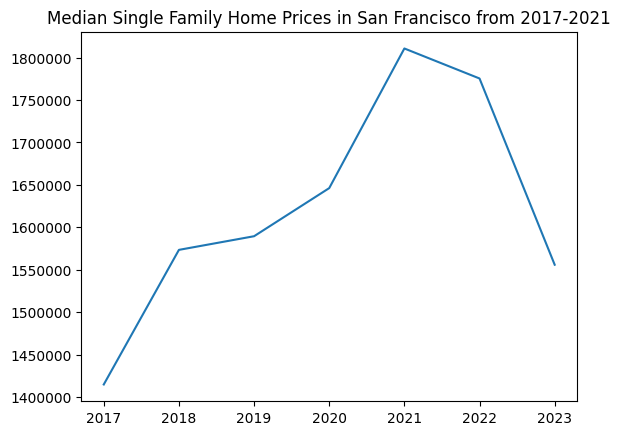

In [ ]:
# Plot Median Single Family Home Prices in San Francisco from 2017-2021
plt.plot(median_sfh_prices_df['San Francisco'], label = 'Median single family home prices in San Francisco')
plt.title('Median Single Family Home Prices in San Francisco from 2017-2021')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False) #disable scientific notation


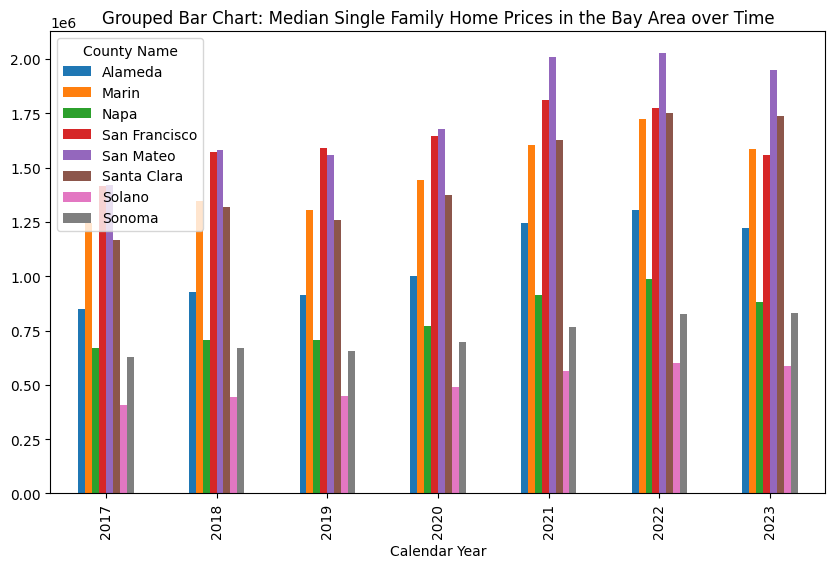

In [ ]:
# Plot Median Housing Prices in the Bay Area Over Time
bay_area_counties = ["Alameda",
                     #"Contra Costa",
                     "Marin",
                     "Napa",
                     "San Francisco",
                     "San Mateo",
                     "Santa Clara",
                     "Solano",
                     "Sonoma"]

BA_median_sfh_prices_df = median_sfh_prices_df[bay_area_counties]
BA_median_sfh_prices_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Calendar Year')
# plt.ylabel('Median single family home prices')
plt.title(f'Grouped Bar Chart: Median Single Family Home Prices in the Bay Area over Time')
plt.legend(title='County Name')
plt.show()